In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

from generic_data import GenericDataset
from SimpleNNs import OneNet, TwoNet

In [2]:
# Seeds 0, 132 similar
# Seeds 2, 10 similar
seed = 132
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
def target(x):
    return np.sin(8 * x) / (4 * np.cos(2 * x))

In [4]:
# define range
low = -2
high = 2

In [5]:
# Generate spline training set
# Xtrain = np.linspace(low, high, 300)
Xtrain = np.random.uniform(low, high, 300)
np.random.shuffle(Xtrain)
Ytrain = target(Xtrain)

In [6]:
# generate spline test set
# Xtest = np.linspace(low, high, 100)
Xtest = np.sort(np.random.uniform(low, high, 100))
Ytest = target(Xtest)

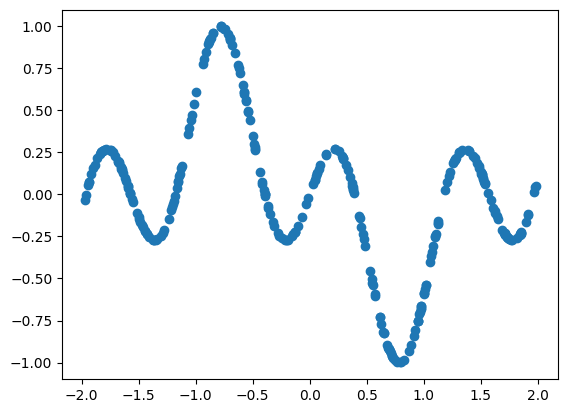

In [7]:
plt.scatter(Xtrain, Ytrain)
plt.show()

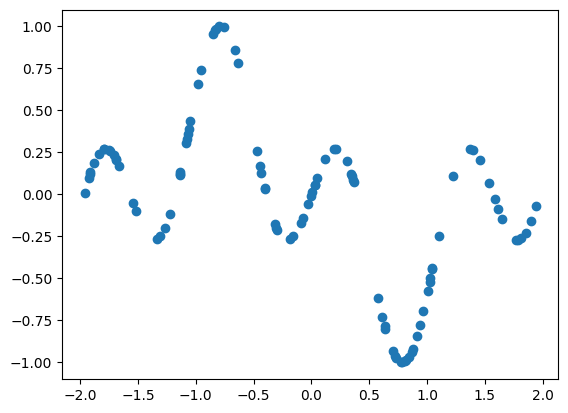

In [8]:
plt.scatter(Xtest, Ytest)
plt.show()

In [9]:
train_dataset = GenericDataset(Xtrain.reshape(-1,1), Ytrain.reshape(-1,1))
test_dataset = GenericDataset(Xtest.reshape(-1,1), Ytest.reshape(-1,1))

In [10]:
# Define model parameters
input_size = 1
output_size = 1
hidden_size = 100
shuffle=False

# Define training parameters
epochs = 100
lr = 0.1
batch_size = 10
decreaselr = False

In [11]:
model=OneNet(input_size, output_size, hidden_size)

In [12]:
# Train OneNet
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=shuffle)

In [ ]:
LOSS=[]

model = model.double()
   
for epoch in range(epochs):
    for x,y in train_loader:
        if epoch in [50, 80] and decreaselr:
            lr = lr*0.5
            
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

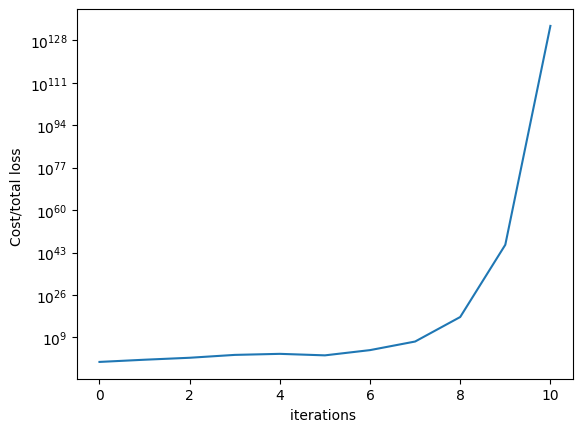

In [14]:
plt.semilogy(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [15]:
model.eval()
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=shuffle)

preds = []
labels = []
    
for batch_vec, batch_labels in iter(test_loader):
    batch_outputs = model(batch_vec)
    batch_preds = batch_outputs.cpu().detach().numpy()
    batch_labels = batch_labels.numpy()
    preds.append(batch_preds)
    labels.append(batch_labels)

preds = np.concatenate(preds)
labels = np.concatenate(labels)

In [16]:
# Compute regression error
regression_error = np.square(np.subtract(preds, labels)).mean()
regression_error

nan

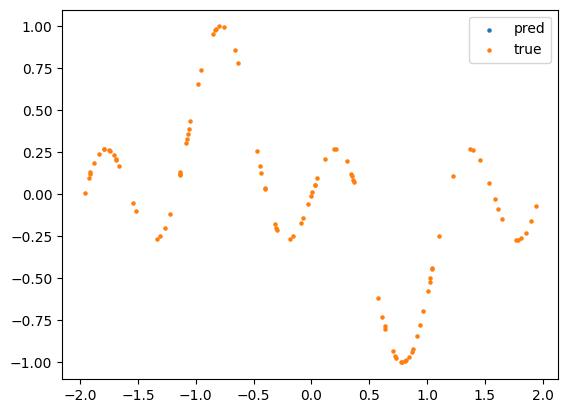

In [17]:
fig, ax = plt.subplots()

ax.scatter(Xtest, preds, label='pred', s=5)
ax.scatter(Xtest, Ytest, label='true', s=5)
ax.legend()
plt.show()

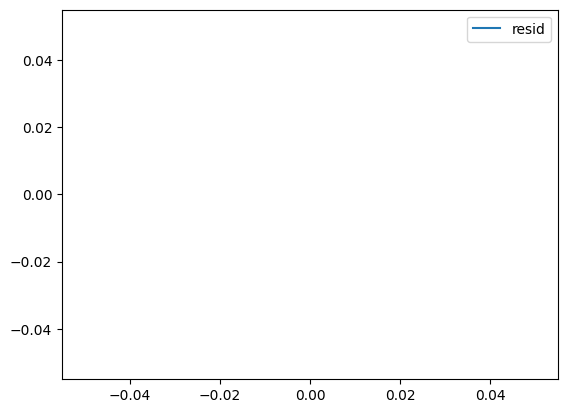

In [18]:
# Residual plot
fig, ax = plt.subplots()

ax.plot(Xtest, np.abs(preds - Ytest.reshape(-1,1)), label='resid')
ax.legend()
plt.show()

In [19]:
# TwoNet
model2=TwoNet(input_size, output_size, hidden_size)

In [20]:
# Train TwoNet
optimizer2 = optim.SGD(model2.parameters(), lr=lr)
criterion2 = nn.MSELoss()
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=shuffle)

In [21]:
LOSS2=[]

model2 = model2.double()
   
for epoch in range(epochs):
    for x,y in train_loader:
        if epoch in [50, 80] and decreaselr:
            lr = lr*0.5
            
        #make a prediction 
        yhat=model2(x)
        #calculate the loss
        loss=criterion2(yhat,y)
        #store loss/cost 
        LOSS2.append(loss.item())
        #clear gradient 
        optimizer2.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer2.step()

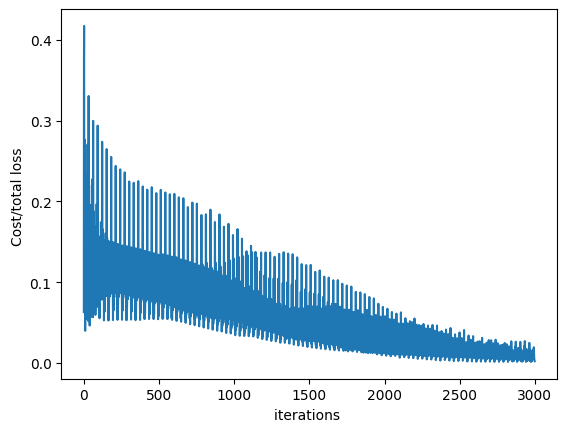

In [22]:
plt.plot(LOSS2)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [23]:
model2.eval()
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=shuffle)

preds = []
labels = []
    
for batch_vec, batch_labels in iter(test_loader):
    batch_outputs = model2(batch_vec)
    batch_preds = batch_outputs.cpu().detach().numpy()
    batch_labels = batch_labels.numpy()
    preds.append(batch_preds)
    labels.append(batch_labels)

preds = np.concatenate(preds)
labels = np.concatenate(labels)

In [24]:
# Compute regression error
regression_error = np.square(np.subtract(preds, labels)).mean()
regression_error

0.06118162955620238

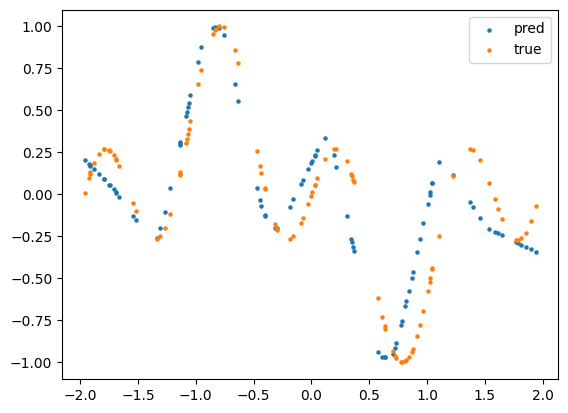

In [25]:
fig, ax = plt.subplots()

ax.scatter(Xtest, preds, label='pred', s=5)
ax.scatter(Xtest, Ytest, label='true', s=5)
ax.legend()
plt.show()

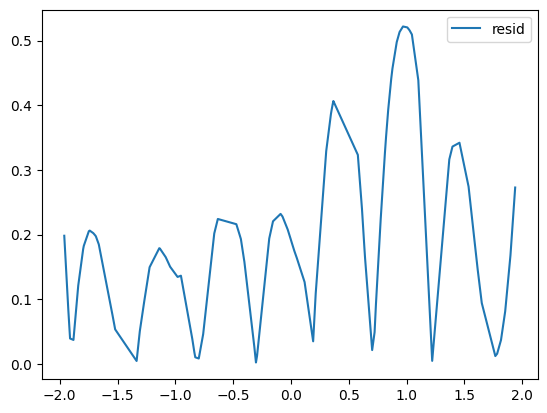

In [26]:
# Residual plot
fig, ax = plt.subplots()

ax.plot(Xtest, np.abs(preds - Ytest.reshape(-1,1)), label='resid')
ax.legend()
plt.show()